#Customer Segmentation
Sebuah perusahaan dapat berkembang dengan pesat saat mengetahui perilaku customer personalitynya, sehingga dapat memberikan layanan serta manfaat lebih baik kepada customers yang berpotensi menjadi **loyal customers**. Dengan mengolah data historikal marketing campaign guna menaikkan performa dan menyasar customers yang tepat agar dapat bertransaksi di platform perusahaan, dari insight data tersebut fokus kita adalah membuat sebuah model prediksi kluster sehingga memudahkan perusahaan dalam membuat keputusan.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import dataset
pd.set_option('display.max_columns',None)
df = pd.read_csv('/content/drive/MyDrive/JGP/week 3/marketing_campaign_data.csv')
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
58,58,8557,1982,S1,Lajang,NaN,1,0,17-06-2013,57,11000,3000,22000,2000,2000,6000,2,2,0,3,6,0,0,0,0,0,0,3,11,0
439,439,456,1986,D3,Menikah,7500000.0,1,0,07-02-2013,96,1000,11000,5000,4000,6000,9000,2,2,0,3,8,0,0,0,0,0,0,3,11,0
741,741,7458,1956,S2,Bertunangan,34941000.0,1,1,06-03-2013,26,39000,2000,25000,4000,3000,24000,2,3,0,3,8,0,0,0,0,0,0,3,11,0
1830,1830,6859,1987,S1,Lajang,29236000.0,1,0,08-10-2013,30,37000,4000,24000,16000,9000,9000,2,4,0,3,9,0,0,0,0,0,0,3,11,0
1543,1543,73,1953,S3,Lajang,51411000.0,1,2,26-05-2013,81,14000,0,3000,0,0,1000,1,0,0,3,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
 df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

##Feature Engineering
Menambahkan fitur representatif untuk mempermudah analisa

###Conversion Rate

In [ ]:
df['Response'].describe()

count    2240.000000
mean        0.149107
std         0.356274
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Response, dtype: float64

In [ ]:
df1 = df.copy()

In [ ]:
 #Cek
 df1[['Response','NumWebVisitsMonth']].loc[(df1['Response']==0) & (df1['NumWebVisitsMonth']==0)]

,Response,NumWebVisitsMonth
164,0,0
655,0,0
687,0,0
905,0,0
975,0,0
1773,0,0
1806,0,0
1910,0,0
1955,0,0
2132,0,0


In [ ]:
#Cek
df1[['Response','NumWebVisitsMonth']].loc[(df1['Response']==1) & (df1['NumWebVisitsMonth']==0)]

,Response,NumWebVisitsMonth


In [ ]:
#Cek
df1.loc[df1['Response']==0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,S2,Bertunangan,62513000.0,0,1,09-09-2013,16,520000,42000,98000,0,42000,14000,2,6,4,10,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,S1,Menikah,34421000.0,1,0,01-07-2013,81,3000,3000,7000,6000,2000,9000,1,1,0,2,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0


In [ ]:
df1 = df1.loc[df1['NumWebVisitsMonth']!=0]

In [ ]:
df1['conv_rate'] = (df1['Response'] / df1['NumWebVisitsMonth'])*100
df1['conv_rate'].describe()

count    2229.000000
mean        4.368587
std        14.298069
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       100.000000
Name: conv_rate, dtype: float64

###Umur

In [ ]:
#from year_birth and dt_customer
df1['Year_Birth'] = pd.to_datetime(df1['Year_Birth'],format='%Y')
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'],format = '%d-%m-%Y')

In [ ]:
df1['Year_Birth'].describe()

<ipython-input-14-362dab9689b0>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1['Year_Birth'].describe()


count                    2229
unique                     59
top       1976-01-01 00:00:00
freq                       89
first     1893-01-01 00:00:00
last      1996-01-01 00:00:00
Name: Year_Birth, dtype: object

In [ ]:
df1['Dt_Customer'].describe()

<ipython-input-15-1666eb6c1ac3>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1['Dt_Customer'].describe()


count                    2229
unique                    662
top       2012-08-31 00:00:00
freq                       12
first     2012-07-30 00:00:00
last      2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [ ]:
df1['Umur'] = round(((df1['Dt_Customer'] - df1['Year_Birth']).dt.days)/365,0)
df1['Umur'].describe()

count    2229.000000
mean       44.720054
std        12.007615
min        17.000000
25%        36.000000
50%        44.000000
75%        54.000000
max       121.000000
Name: Umur, dtype: float64

####Pengelompokkan Umur

Berdasarkan bappenas, kelompok usia dibagi menjadi: (https://sepakat.bappenas.go.id/wiki/Kelompok_Usia)

- 15-24 tahun: Kelompok usia muda
- 25-34 tahun: Kelompok usia pekerja awal
- 35-44 tahun: Kelompok usia paruh baya
- 45-54 tahun: Kelompok usia pra-pensiun
- 55-64 tahun: Kelompok usia pensiun
- 65 tahun ke atas: Kelompok usia lanjut

produktif 15-64 tahun, non produktif

In [ ]:

def kelompok_usia(i):
  if i < 25:
    return 'Muda'
  elif i < 35:
    return 'Pekerja Awal'
  elif i < 45:
    return 'Paruh Baya'
  elif i < 55:
    return 'Pra Pensiun'
  elif i < 65:
    return 'Pensiun'
  else:
    return 'Lanjut'


In [ ]:
df1['kelompok_usia'] = df1.Umur.apply(kelompok_usia)

###Jumlah Anak

In [ ]:
df1['jumlah_anak'] = df1['Kidhome'] + df1['Teenhome']

In [ ]:
df1['jumlah_anak'].describe()

count    2229.000000
mean        0.953791
std         0.750894
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: jumlah_anak, dtype: float64

###Total Pembelian

In [ ]:
df1['total_pembelian'] = df1['MntCoke'] + df1['MntFruits'] + df1['MntMeatProducts']
+ df1['MntFishProducts'] + df1['MntSweetProducts'] + df1['MntGoldProds']

0       348000
1         9000
2       174000
3        18000
4        88000
         ...  
2235    407000
2236      8000
2237     68000
2238    171000
2239     24000
Length: 2229, dtype: int64

In [ ]:
df1['total_pembelian'].describe()

count    2.229000e+03
mean     4.953109e+05
std      5.199647e+05
min      0.000000e+00
25%      4.200000e+04
50%      2.930000e+05
75%      8.440000e+05
max      2.246000e+06
Name: total_pembelian, dtype: float64

###Total Transaksi

In [ ]:
df1['total_transaksi'] = df1['NumDealsPurchases'] + df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases']

In [ ]:
df1['total_transaksi'].describe()

count    2229.000000
mean       14.843876
std         7.631189
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        43.000000
Name: total_transaksi, dtype: float64

In [ ]:
#cek
df1.loc[df1['total_transaksi']==0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,conv_rate,Umur,kelompok_usia,jumlah_anak,total_pembelian,total_transaksi
981,3955,1965-01-01,S1,Cerai,4861000.0,0,0,2014-06-22,20,2000,1000,1000,1000,0,1000,0,0,0,0,14,0,0,0,0,0,0,3,11,0,0.0,50.0,Pra Pensiun,0,4000,0
1524,11110,1973-01-01,S1,Lajang,3502000.0,1,0,2013-04-13,56,2000,1000,1000,0,0,1000,0,0,0,0,14,0,0,0,0,0,0,3,11,0,0.0,40.0,Paruh Baya,1,4000,0


terlihat ada pembelian tapi tidak ada transaksi?

In [ ]:
df1 = df1.loc[df1['total_transaksi']!=0]

###Rata-rata Pembelian / Transaksi

In [ ]:
df1['rata2_pt'] = df1['total_pembelian'] / df1['total_transaksi']

<ipython-input-27-c376e030f60c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['rata2_pt'] = df1['total_pembelian'] / df1['total_transaksi']


In [ ]:
df1['rata2_pt'].describe()

count      2227.000000
mean      26227.605368
std       24923.925424
min           0.000000
25%        6400.000000
50%       18416.666667
75%       36546.583851
max      158692.307692
Name: rata2_pt, dtype: float64

###Total Accepted Campaign

In [ ]:
df1['total_ac'] = df1['AcceptedCmp1'] + df1['AcceptedCmp2'] + df1['AcceptedCmp3'] + df1['AcceptedCmp4'] + df1['AcceptedCmp5']
df1['total_ac'].describe()

<ipython-input-29-dc3534fe00e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_ac'] = df1['AcceptedCmp1'] + df1['AcceptedCmp2'] + df1['AcceptedCmp3'] + df1['AcceptedCmp4'] + df1['AcceptedCmp5']


count    2227.000000
mean        0.299057
std         0.679843
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: total_ac, dtype: float64

##EDA

In [ ]:
from google.colab import files

In [ ]:
df2 = df1.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2227 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2227 non-null   int64         
 1   Year_Birth           2227 non-null   datetime64[ns]
 2   Education            2227 non-null   object        
 3   Marital_Status       2227 non-null   object        
 4   Income               2204 non-null   float64       
 5   Kidhome              2227 non-null   int64         
 6   Teenhome             2227 non-null   int64         
 7   Dt_Customer          2227 non-null   datetime64[ns]
 8   Recency              2227 non-null   int64         
 9   MntCoke              2227 non-null   int64         
 10  MntFruits            2227 non-null   int64         
 11  MntMeatProducts      2227 non-null   int64         
 12  MntFishProducts      2227 non-null   int64         
 13  MntSweetProducts     2227 non-nul

In [ ]:
#cek duplicate
df2.duplicated(subset=['ID']).sum()

0

In [ ]:
df2 = df2.drop(columns=['ID','Year_Birth','Dt_Customer','Kidhome','Teenhome','Z_CostContact','Z_Revenue'],axis=1)

In [ ]:
#drop karena sudah terepresentasi pada feature engineering
df2 = df2.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],axis=1)

In [ ]:
#missing values
(df2.isna().mean()[df2.isna().mean()>0])*100

Income    1.03278
dtype: float64

In [ ]:
#split category
num = df2.select_dtypes(exclude=['object'])
kat = df2.select_dtypes(include=['object'])

###Numerical

In [ ]:
#stat desc
num.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2204.0,5.204714e+07,2.473062e+07,1730000.0,35303000.0,5.134200e+07,6.828975e+07,6.666660e+08
Recency,2227.0,4.907050e+01,2.894669e+01,0.0,24.0,4.900000e+01,7.400000e+01,9.900000e+01
NumWebVisitsMonth,2227.0,5.334980e+00,2.390655e+00,1.0,3.0,6.000000e+00,7.000000e+00,2.000000e+01
Complain,2227.0,9.429726e-03,9.666955e-02,0.0,0.0,0.000000e+00,0.000000e+00,1.000000e+00
Response,2227.0,1.499775e-01,3.571296e-01,0.0,0.0,0.000000e+00,0.000000e+00,1.000000e+00
conv_rate,2227.0,4.372510e+00,1.430389e+01,0.0,0.0,0.000000e+00,0.000000e+00,1.000000e+02
Umur,2227.0,4.471980e+01,1.201207e+01,17.0,36.0,4.400000e+01,5.400000e+01,1.210000e+02
jumlah_anak,2227.0,9.541985e-01,7.509587e-01,0.0,0.0,1.000000e+00,1.000000e+00,3.000000e+00
total_pembelian,2227.0,4.957521e+05,5.199896e+05,0.0,42500.0,2.940000e+05,8.445000e+05,2.246000e+06
total_transaksi,2227.0,1.485721e+01,7.621628e+00,1.0,8.0,1.500000e+01,2.100000e+01,4.300000e+01


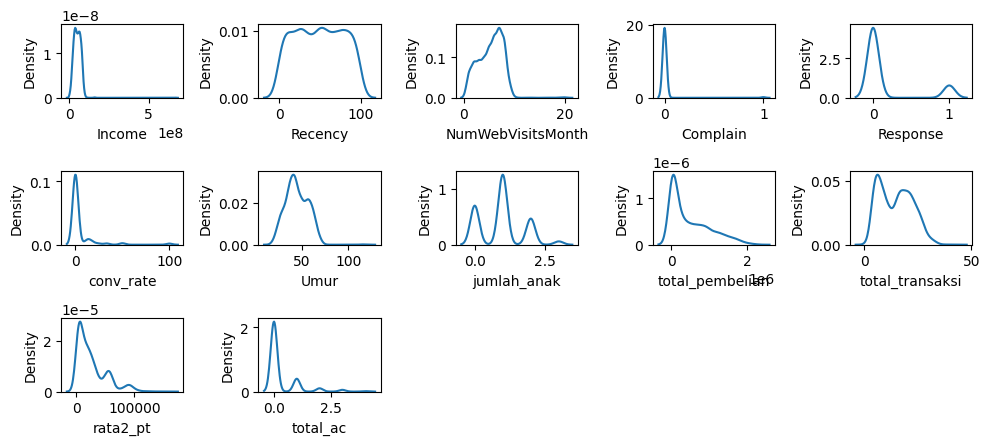

In [ ]:
#univariate
num1 = num.columns.tolist()

plt.figure(figsize=(10,10))
for i in range (0,len(num1)):
  plt.subplot(7,5,i+1)
  sns.kdeplot(x=df2[num1[i]])
  plt.tight_layout()

notes:
- z cost contact & revenue only have 1 value

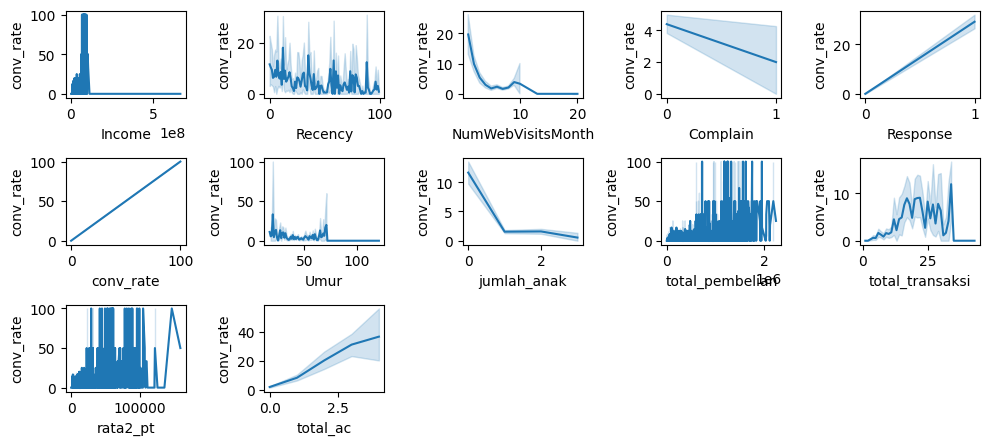

In [ ]:
#bivariate

plt.figure(figsize=(10,10))
for i in range (0,len(num1)):
  plt.subplot(7,5,i+1)
  sns.lineplot(x=df2[num1[i]],y=df2['conv_rate'])
  plt.tight_layout()

###Categorical

In [ ]:
#stat desc
kat.describe().T

,count,unique,top,freq
Education,2227,5,S1,1122
Marital_Status,2227,6,Menikah,860
kelompok_usia,2227,6,Paruh Baya,742


In [ ]:
for i in kat:
  print(i)
  print(df2[i].value_counts())
  print()

Education
S1     1122
S3      480
S2      370
D3      201
SMA      54
Name: Education, dtype: int64

Marital_Status
Menikah        860
Bertunangan    577
Lajang         481
Cerai          230
Janda           76
Duda             3
Name: Marital_Status, dtype: int64

kelompok_usia
Paruh Baya      742
Pra Pensiun     488
Pensiun         457
Pekerja Awal    377
Lanjut           91
Muda             72
Name: kelompok_usia, dtype: int64



In [ ]:
print('Unique Values')
for i in kat:
  print(f"{i:15}{np.unique(df2[i])}")

Unique Values
Education      ['D3' 'S1' 'S2' 'S3' 'SMA']
Marital_Status ['Bertunangan' 'Cerai' 'Duda' 'Janda' 'Lajang' 'Menikah']
kelompok_usia  ['Lanjut' 'Muda' 'Paruh Baya' 'Pekerja Awal' 'Pensiun' 'Pra Pensiun']


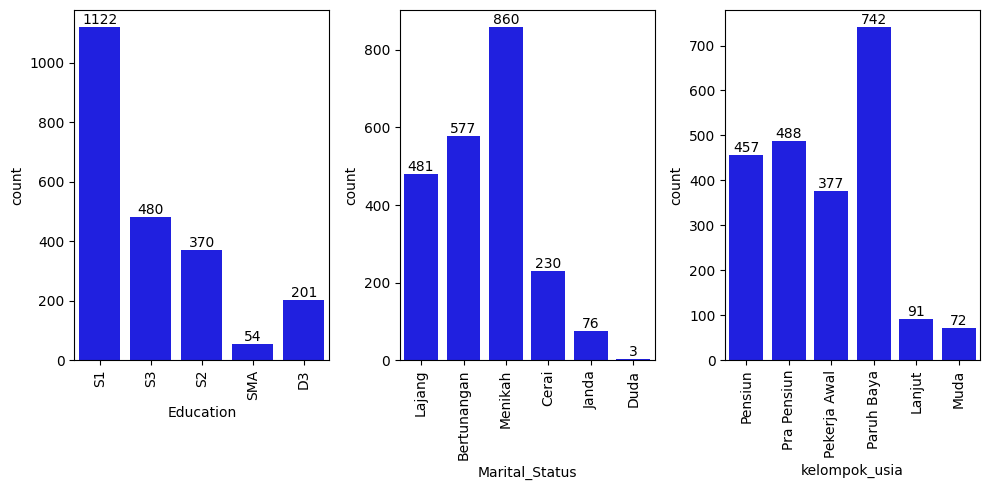

In [ ]:
#univariate

kat1= kat.columns.tolist()

plt.figure(figsize=(10,5))
for i in range(0,len(kat1)):
  plt.subplot(1,3,i+1)
  ax = sns.countplot(x=df1[kat1[i]],color='blue')
  plt.tight_layout()
  plt.xticks(rotation=90)
  plt.bar_label(ax.containers[0])


  plt.savefig('kat_count.jpg')

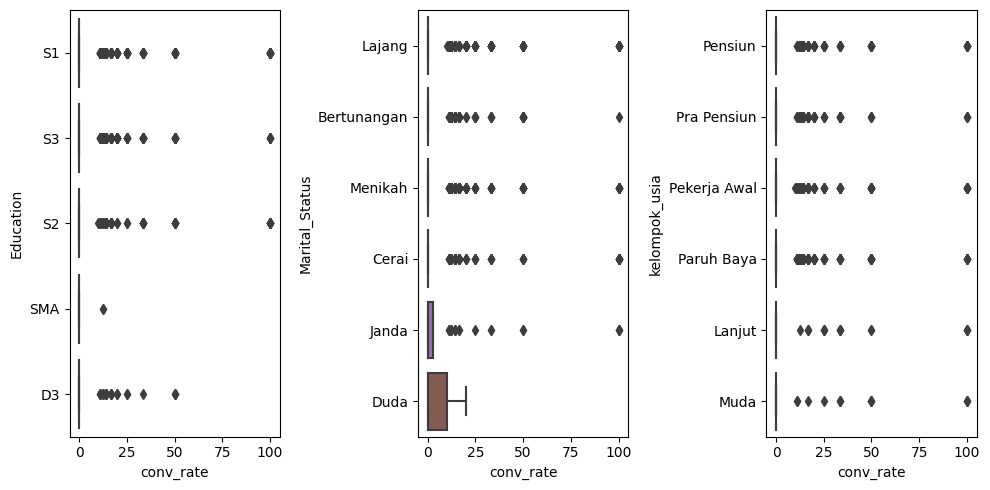

In [ ]:
#bivariate
plt.figure(figsize=(10,5))
for i in range(0,len(kat1)):
  plt.subplot(1,3,i+1)
  sns.boxplot(x=df1['conv_rate'],y=df1[kat1[i]])
  plt.tight_layout()

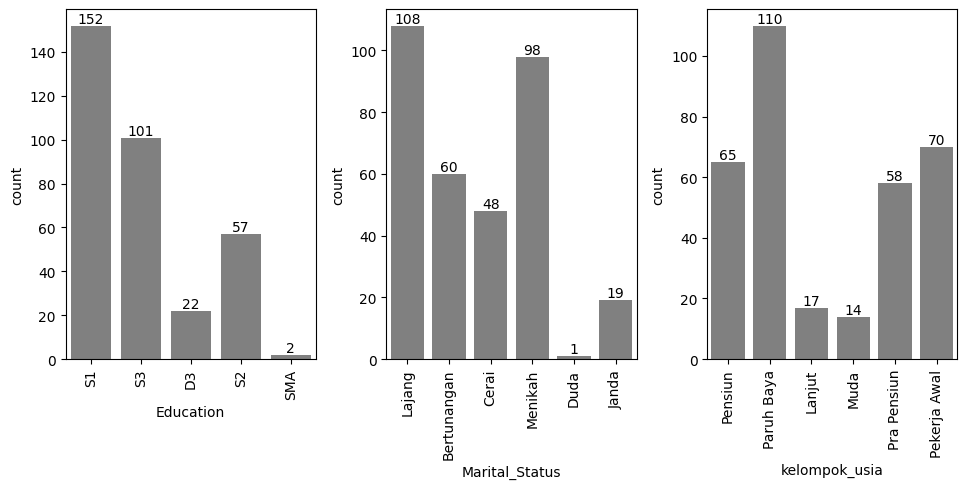

In [ ]:
plt.figure(figsize=(10,5))
for i in range(0,len(kat1)):
  plt.subplot(1,3,i+1)
  ax = sns.countplot(x=df2[kat1[i]][df2['Response']==1],color='grey')
  plt.tight_layout()
  plt.xticks(rotation=90)
  plt.bar_label(ax.containers[0])

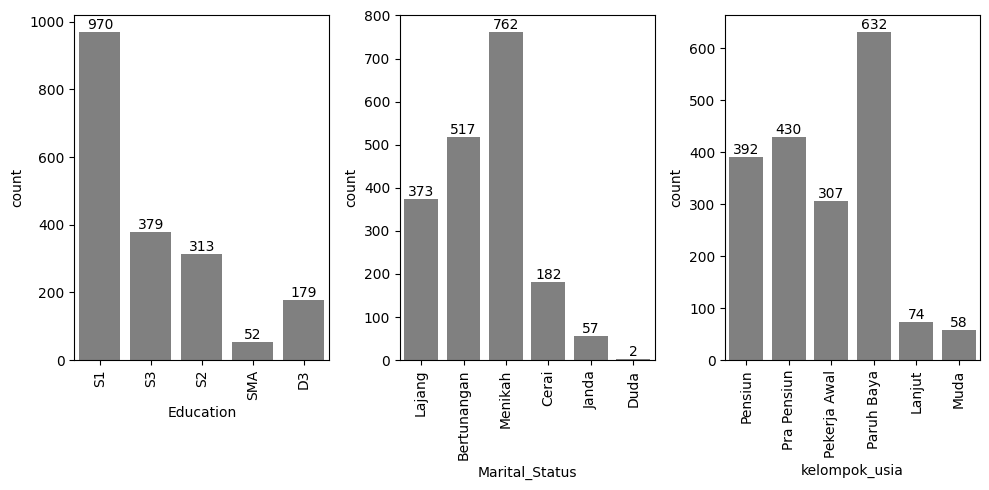

In [ ]:
plt.figure(figsize=(10,5))
for i in range(0,len(kat1)):
  plt.subplot(1,3,i+1)
  ax = sns.countplot(x=df2[kat1[i]][df2['Response']==0],color='grey')
  plt.tight_layout()
  plt.xticks(rotation=90)
  plt.bar_label(ax.containers[0])

##EDA per Fitur

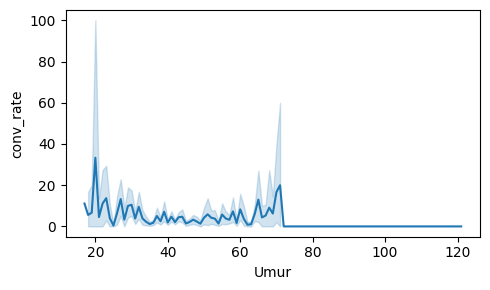

In [ ]:
plt.figure(figsize=(5,3))
sns.lineplot(df2,x=df2['Umur'],y=df2['conv_rate'])
plt.tight_layout()

([<matplotlib.axis.XTick at 0x7f3f13faab00>,
 [Text(0.0, 0, '0'), Text(1.0, 0, '1'), Text(2.0, 0, '2'), Text(3.0, 0, '3')])

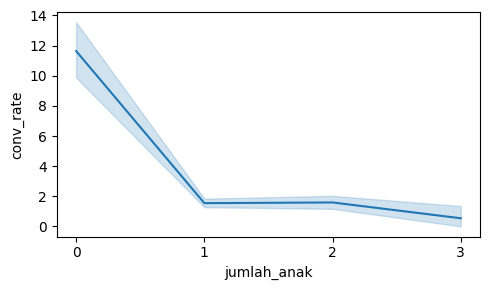

In [ ]:
x = [0.0,1.0,2.0,3.0]

plt.figure(figsize=(5,3))
sns.lineplot(df2,x=df2['jumlah_anak'],y=df2['conv_rate'])
plt.tight_layout()
plt.xticks(x)

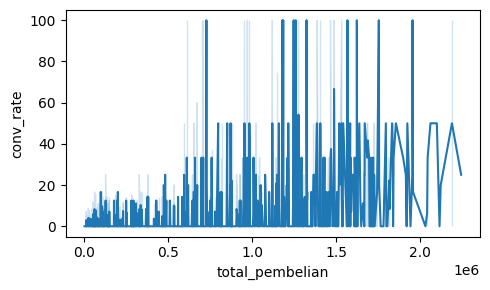

In [ ]:
plt.figure(figsize=(5,3))
sns.lineplot(df2,x=df2['total_pembelian'],y=df2['conv_rate'])
plt.tight_layout()

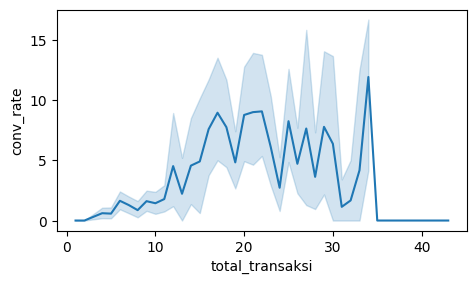

In [ ]:
plt.figure(figsize=(5,3))
sns.lineplot(df2,x=df2['total_transaksi'],y=df2['conv_rate'])
plt.tight_layout()

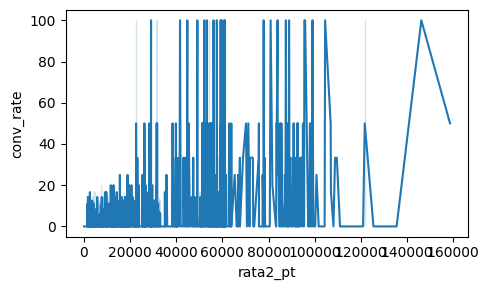

In [ ]:
plt.figure(figsize=(5,3))
sns.lineplot(df2,x=df2['rata2_pt'],y=df2['conv_rate'])
plt.tight_layout()

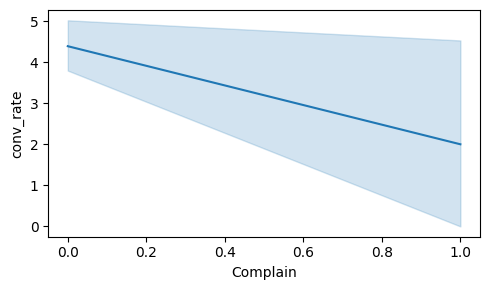

In [ ]:
plt.figure(figsize=(5,3))
sns.lineplot(df2,x=df2['Complain'],y=df2['conv_rate'])
plt.tight_layout()

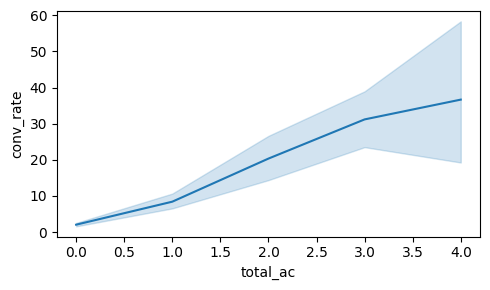

In [ ]:
plt.figure(figsize=(5,3))
sns.lineplot(df2,x=df2['total_ac'],y=df2['conv_rate'])
plt.tight_layout()

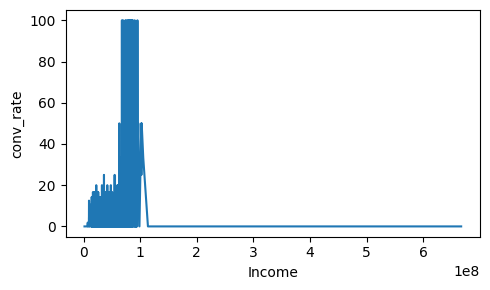

In [ ]:
plt.figure(figsize=(5,3))
sns.lineplot(df2,x=df2['Income'],y=df2['conv_rate'])
plt.tight_layout()

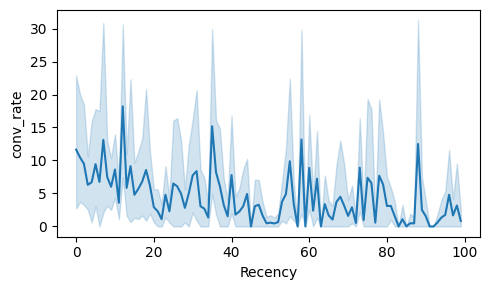

In [ ]:
plt.figure(figsize=(5,3))
sns.lineplot(df2,x=df2['Recency'],y=df2['conv_rate'])
plt.tight_layout()

##Preprocessing

In [ ]:
df3 = df2.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2227 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2227 non-null   object 
 1   Marital_Status     2227 non-null   object 
 2   Income             2204 non-null   float64
 3   Recency            2227 non-null   int64  
 4   NumWebVisitsMonth  2227 non-null   int64  
 5   Complain           2227 non-null   int64  
 6   Response           2227 non-null   int64  
 7   conv_rate          2227 non-null   float64
 8   Umur               2227 non-null   float64
 9   kelompok_usia      2227 non-null   object 
 10  jumlah_anak        2227 non-null   int64  
 11  total_pembelian    2227 non-null   int64  
 12  total_transaksi    2227 non-null   int64  
 13  rata2_pt           2227 non-null   float64
 14  total_ac           2227 non-null   int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 278.4+ KB


In [ ]:
(df3.isna().mean()[df3.isna().mean()>0])*100

Income    1.03278
dtype: float64

In [ ]:
df3['Income'].fillna(df3['Income'].median(),inplace=True)

In [ ]:
#marital_status
ms = {
    new_key : new_val
    for keys, new_val in [(['Lajang','Cerai','Janda','Duda','Bertunangan'],'Single')]
    for new_key in keys
}
df3['Marital_Status']=df3['Marital_Status'].replace(ms)

In [ ]:
df3['Marital_Status'].value_counts()

Single     1367
Menikah     860
Name: Marital_Status, dtype: int64

In [ ]:
df3 = pd.get_dummies(df3,columns=['Marital_Status'])

In [ ]:
#education
df3 = df3.drop(columns=['Education'],axis=1)

In [ ]:
#kelompok_usia
df3 = pd.get_dummies(df3,columns=['kelompok_usia'])

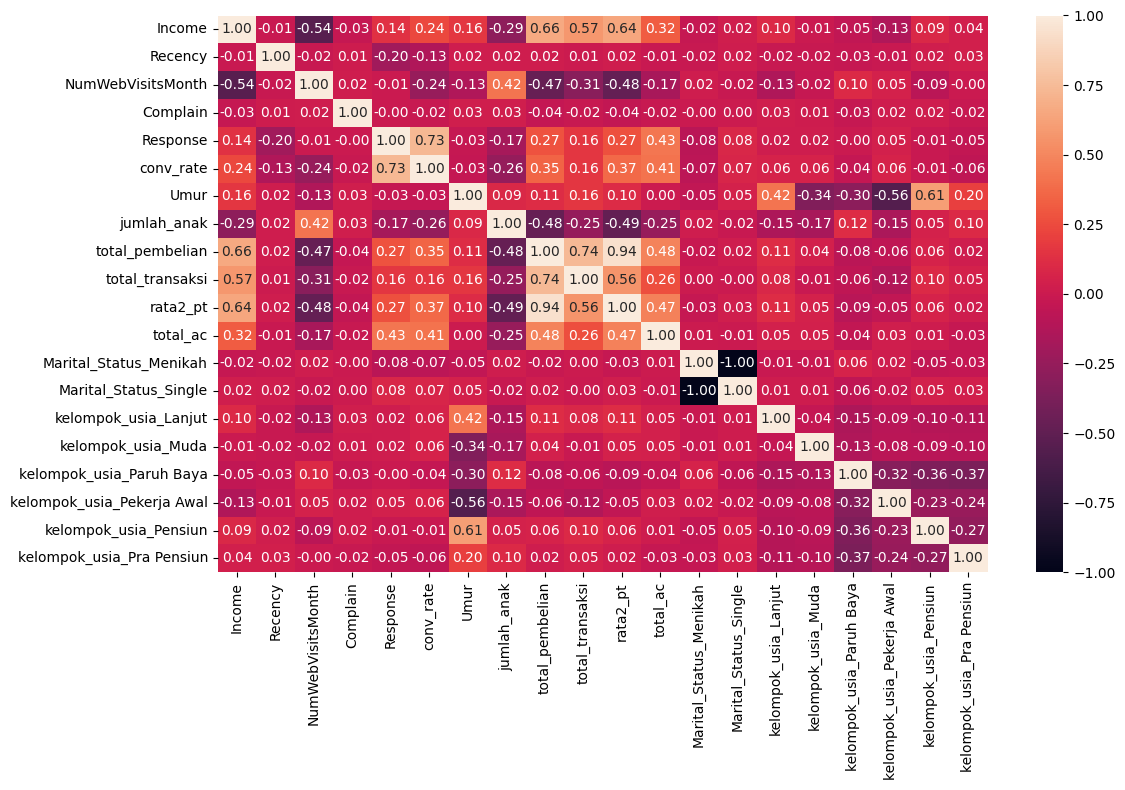

In [ ]:
#correlation
plt.figure(figsize=(12,8))
sns.heatmap(df3.corr(),annot=True,fmt='.2f')
plt.tight_layout()

In [ ]:
#drop fitur yang saling berkorelasi
df3 = df3.drop(columns=['Marital_Status_Single'],axis=1)

In [ ]:
#standarisasi

df4 = df3.copy()
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

for col in df4:
  df4[col] = ss.fit_transform(df4[col].values.reshape(-1,1))

In [ ]:
df4.head(3)

,Income,Recency,NumWebVisitsMonth,Complain,Response,conv_rate,Umur,jumlah_anak,total_pembelian,total_transaksi,rata2_pt,total_ac,Marital_Status_Menikah,kelompok_usia_Lanjut,kelompok_usia_Muda,kelompok_usia_Paruh Baya,kelompok_usia_Pekerja Awal,kelompok_usia_Pensiun,kelompok_usia_Pra Pensiun
0,0.247921,0.308550,0.696627,-0.097568,2.380686,0.693198,0.939283,-1.270926,1.487379,1.331090,0.984512,-0.43999,-0.793168,-0.206405,-0.182786,-0.706869,-0.451424,1.968016,-0.529737
1,-0.231566,-0.382530,-0.140152,-0.097568,-0.420047,-0.305755,1.272356,1.392935,-0.918979,-1.162376,-0.932149,-0.43999,-0.793168,-0.206405,-0.182786,-0.706869,-0.451424,1.968016,-0.529737
2,0.795750,-0.797178,-0.558541,-0.097568,-0.420047,-0.305755,0.356405,-1.270926,0.204373,0.806150,0.097882,-0.43999,-0.793168,-0.206405,-0.182786,-0.706869,-0.451424,-0.508126,1.887730


##Clustering
Menggunakan RFM analysis untuk mensegmentasi customer/ RFM merupakan singkatan dari Recency, Frequency, dan Monetary.

In [ ]:
df5 = df4.copy()
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2227 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Income                      2227 non-null   float64
 1   Recency                     2227 non-null   float64
 2   NumWebVisitsMonth           2227 non-null   float64
 3   Complain                    2227 non-null   float64
 4   Response                    2227 non-null   float64
 5   conv_rate                   2227 non-null   float64
 6   Umur                        2227 non-null   float64
 7   jumlah_anak                 2227 non-null   float64
 8   total_pembelian             2227 non-null   float64
 9   total_transaksi             2227 non-null   float64
 10  rata2_pt                    2227 non-null   float64
 11  total_ac                    2227 non-null   float64
 12  Marital_Status_Menikah      2227 non-null   float64
 13  kelompok_usia_Lanjut        2227 

In [ ]:
rfm = ['Recency','total_transaksi','total_pembelian']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: >

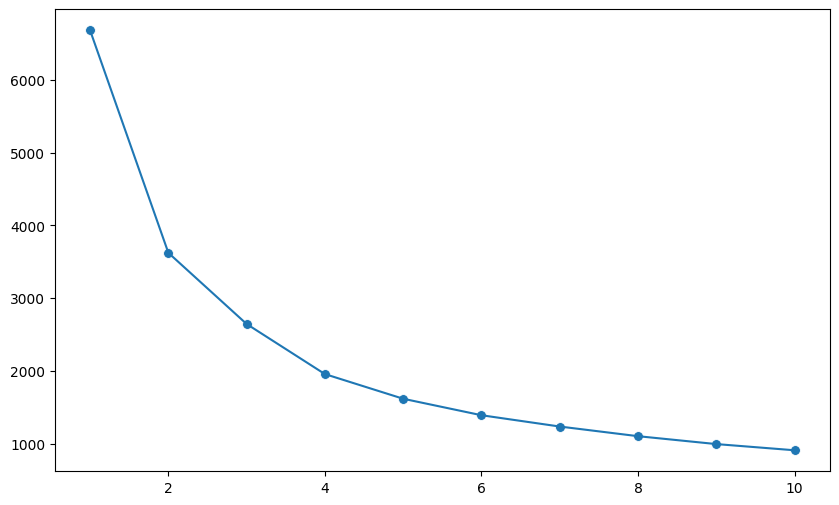

In [ ]:
#k-means
from sklearn.cluster import KMeans

inertia = []
for i in range(1,11):
  clusterer = KMeans(n_clusters=i,random_state=20)
  clusterer.fit(df5[rfm])
  inertia.append(clusterer.inertia_)

plt.figure(figsize=(10,6))
sns.lineplot(x=range(1,11), y=inertia)
sns.scatterplot(x=range(1,11), y=inertia, s=50)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

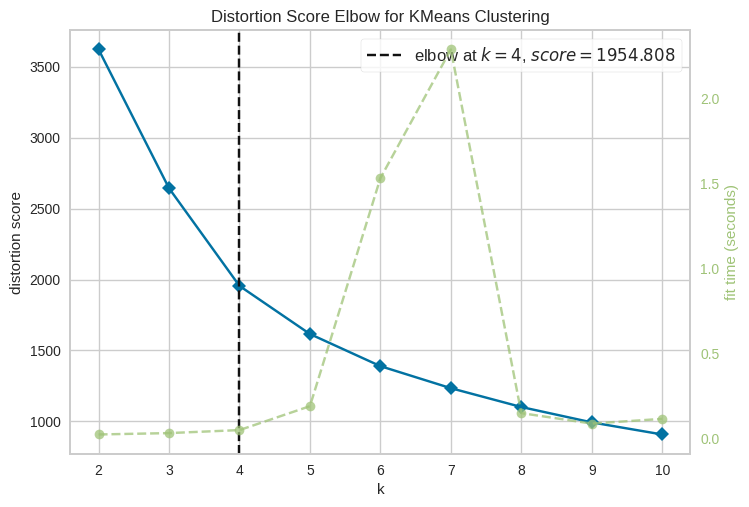

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(clusterer)
visualizer.fit(df4[rfm])
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


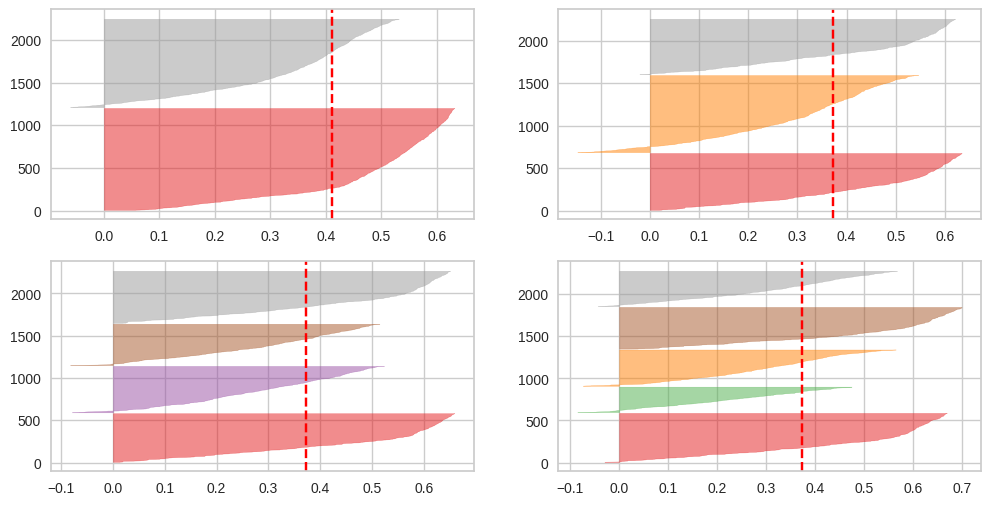

In [ ]:
#silhouette score
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(12,6))
for i in [2,3,4,5]:
  km = KMeans(n_clusters=i,random_state=20)
  q, mod = divmod(i,2)
  visual = SilhouetteVisualizer(km,ax=ax[q-1][mod])
  visual.fit(df5[rfm])



Berdasarkan elbow method dan silhoutte score, cluster terbaik adalah 4

In [ ]:
kmeans = KMeans(n_clusters=4,random_state=20)
kmeans.fit(df5[rfm])
kmeans.predict(df5[rfm])

df5['cluster'] = (kmeans.labels_) + 1
df5.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Income,Recency,NumWebVisitsMonth,Complain,Response,conv_rate,Umur,jumlah_anak,total_pembelian,total_transaksi,rata2_pt,total_ac,Marital_Status_Menikah,kelompok_usia_Lanjut,kelompok_usia_Muda,kelompok_usia_Paruh Baya,kelompok_usia_Pekerja Awal,kelompok_usia_Pensiun,kelompok_usia_Pra Pensiun,cluster
0,0.247921,0.308550,0.696627,-0.097568,2.380686,0.693198,0.939283,-1.270926,1.487379,1.331090,0.984512,-0.43999,-0.793168,-0.206405,-0.182786,-0.706869,-0.451424,1.968016,-0.529737,2
1,-0.231566,-0.382530,-0.140152,-0.097568,-0.420047,-0.305755,1.272356,1.392935,-0.918979,-1.162376,-0.932149,-0.43999,-0.793168,-0.206405,-0.182786,-0.706869,-0.451424,1.968016,-0.529737,4
2,0.795750,-0.797178,-0.558541,-0.097568,-0.420047,-0.305755,0.356405,-1.270926,0.204373,0.806150,0.097882,-0.43999,-0.793168,-0.206405,-0.182786,-0.706869,-0.451424,-0.508126,1.887730,3
3,-1.032392,-0.797178,0.278237,-0.097568,-0.420047,-0.305755,-1.225693,0.061004,-0.886279,-0.899906,-0.876969,-0.43999,-0.793168,-0.206405,-0.182786,-0.706869,2.215211,-0.508126,-0.529737,4
4,0.254223,1.552495,-0.140152,-0.097568,-0.420047,-0.305755,-0.975888,0.061004,-0.311138,0.543680,-0.347080,-0.43999,1.260768,-0.206405,-0.182786,-0.706869,2.215211,-0.508126,-0.529737,2


In [ ]:
df3['cluster'] = (kmeans.labels_) + 1

###Visualisasi

In [ ]:
df5['cluster'].value_counts()

4    616
1    574
2    549
3    488
Name: cluster, dtype: int64

Text(0.5, 1.0, 'Jumlah Customer per Cluster')

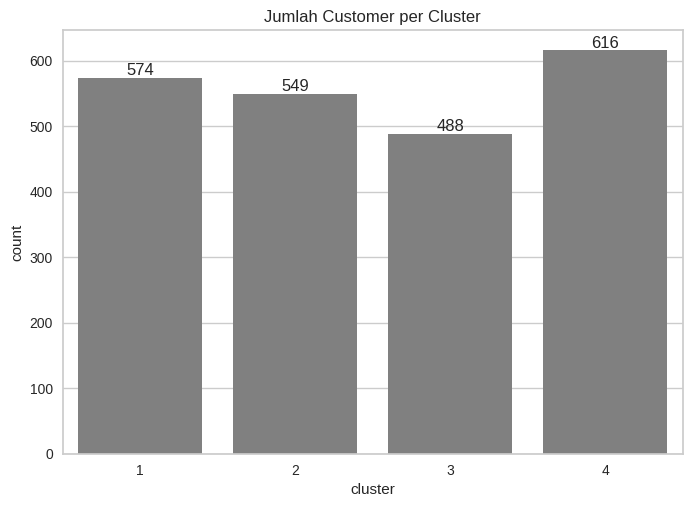

In [ ]:
ax = sns.countplot(df5,x=df5['cluster'],color='grey')
plt.bar_label(ax.containers[0])

plt.title('Jumlah Customer per Cluster')

Text(0.5, 1.0, 'Cluster vs Recency')

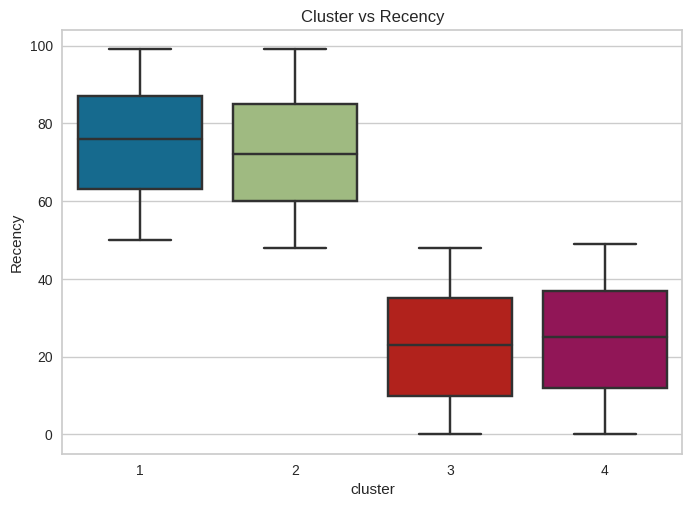

In [ ]:
sns.boxplot(data=df3, x='cluster', y='Recency')
plt.title('Cluster vs Recency')

Text(0.5, 1.0, 'Cluster vs Total Transaksi')

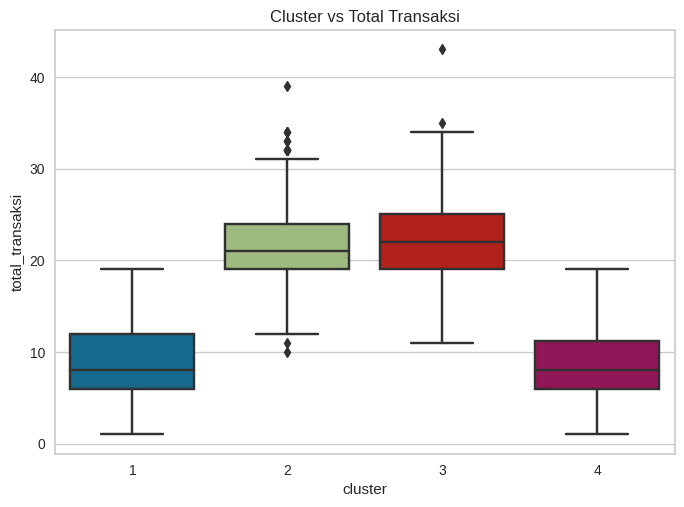

In [ ]:
sns.boxplot(data=df3, x='cluster', y='total_transaksi')
plt.title('Cluster vs Total Transaksi')

Text(0.5, 1.0, 'Cluster vs Total Pembelian')

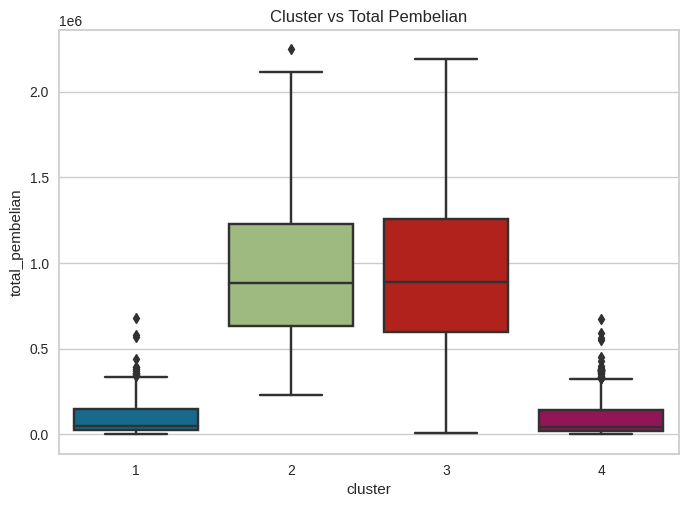

In [ ]:
sns.boxplot(data=df3, x='cluster', y='total_pembelian')
plt.title('Cluster vs Total Pembelian')

Kesimpulan:
- cluster 1: Pembeli yang sudah lama tidak belanja, transaksi dilakukan sedikit, pembelian sedikit
- cluster 2: Pembeli yang sudah lama tidak belanja, tetapi transaksi dan pembelian yang dilakukan banyak
- cluster 3: Pembeli yang baru berbelanja, dengan transaksi dan pembelian yang dilakukan banyak
- cluster 4: Pembeli yang baru berbelanja, tetapi transaksi dan pembelian yang dilakukan sedikit